In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#%matplotlib qt

In [3]:
df = pd.read_csv("data_uci.csv",sep=";")

In [4]:
df.shape

(303, 6)

In [5]:
df.head()

,edad,td,par,col,fcm,riesgo
0,63,1,145,233,150,bajo
1,67,4,160,286,108,alto
2,67,4,120,229,129,alto
3,37,3,130,250,187,bajo
4,41,2,130,204,172,bajo


In [6]:
df.describe(include=np.number).T.apply(lambda s: s.apply(lambda x: format(x, 'f')))


,count,mean,std,min,25%,50%,75%,max
edad,303.000000,54.438944,9.038662,29.000000,48.000000,56.000000,61.000000,77.000000
td,303.000000,3.158416,0.960126,1.000000,3.000000,3.000000,4.000000,4.000000
par,303.000000,127.524752,28.420772,-1.000000,120.000000,130.000000,140.000000,200.000000
col,303.000000,246.693069,51.776918,126.000000,211.000000,241.000000,275.000000,564.000000
fcm,303.000000,145.528053,32.898676,0.000000,132.000000,152.000000,165.000000,202.000000


In [7]:
df.isnull().sum()

edad      0
td        0
par       0
col       0
fcm       0
riesgo    0
dtype: int64

<Axes: xlabel='riesgo', ylabel='count'>

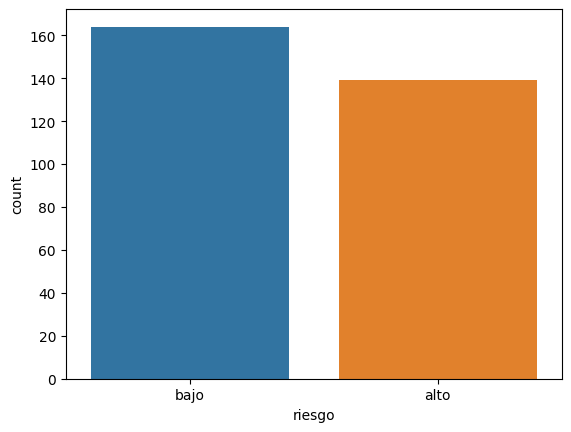

In [8]:
fig = plt.figure()
target = df['riesgo']
sns.countplot(x=target)



In [9]:
#Interpolacion de valores 0 para Frecuencia cardiaca maxima
df['fcm'].replace(to_replace=0,value=np.nan,inplace=True)
df['fcm'].interpolate(method='linear',inplace=True)
print(df['fcm'])

0      150.0
1      108.0
2      129.0
3      187.0
4      172.0
       ...  
298    132.0
299    141.0
300    157.5
301    174.0
302    173.0
Name: fcm, Length: 303, dtype: float64


In [10]:
#Interpolacion de valores 0 para presion arterial en reposo
df['par'].replace(to_replace=0,value=np.nan,inplace=True)
df['par'].replace(to_replace=-1,value=np.nan,inplace=True)
df['par'].interpolate(method='linear',inplace=True)
print(df['par'])

0      145.0
1      160.0
2      120.0
3      130.0
4      130.0
       ...  
298    110.0
299    144.0
300    130.0
301    130.0
302    138.0
Name: par, Length: 303, dtype: float64


In [11]:
Bajo, Alto = df['riesgo'].value_counts()
print(Bajo)
print(Alto)

164
139


144
86
50
23


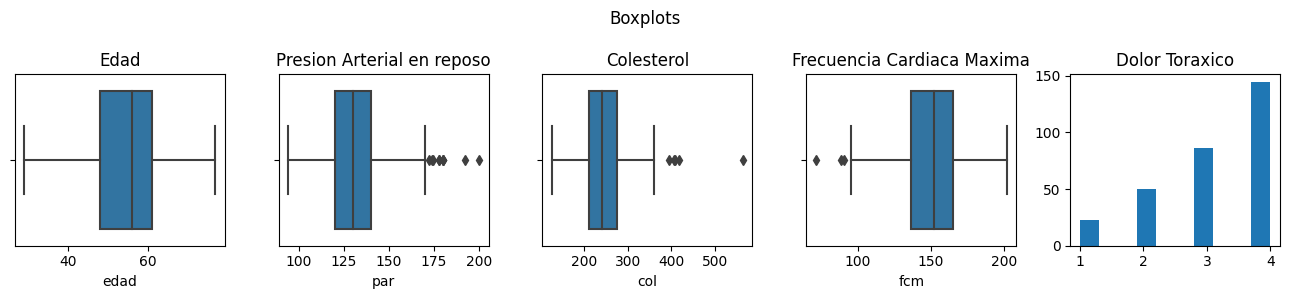

In [19]:
fig, ax = plt.subplots(1,5,figsize=(13,3))
fig.suptitle('Boxplots')
sns.boxplot(x=df['edad'], ax=ax[0])
ax[0].set_title('Edad')
sns.boxplot(x=df['par'], ax=ax[1])
ax[1].set_title('Presion Arterial en reposo')
sns.boxplot(x=df['col'], ax=ax[2])
ax[2].set_title('Colesterol')
sns.boxplot(x=df['fcm'], ax=ax[3])
ax[3].set_title('Frecuencia Cardiaca Maxima')
ax[4].hist(x=df['td'])
ax[4].set_title('Dolor Toraxico')
plt.tight_layout()
angTip,angAtip,noAng,asint = df['td'].value_counts()
print(angTip)
print(angAtip)
print(noAng)
print(asint)


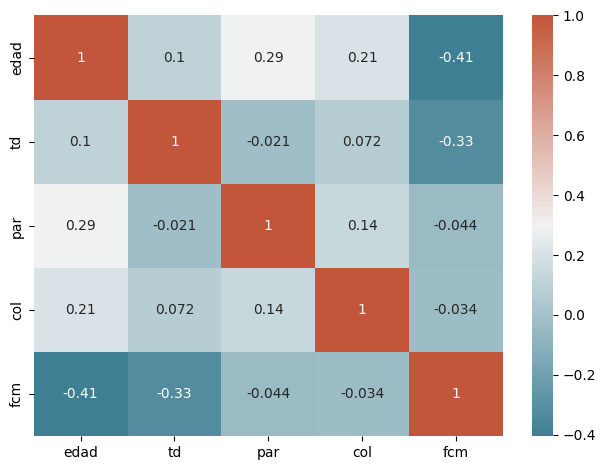

In [13]:
#Analizamos correlacion
corr = df.corr(numeric_only = True)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout()

In [14]:
#Modificamos el dataset para trabajar los datos categoricos
df['riesgo'] = df['riesgo'].map({'bajo':0,'alto':1})


In [15]:
#Separamos las variables de entrada y salida
X = df[['edad','td','par','col','fcm']]
Y = df['riesgo']

In [16]:
#Aplicamos el oversampling visto en clases de práctica:
import imblearn
from imblearn.over_sampling import RandomOverSampler


<Axes: xlabel='riesgo', ylabel='count'>

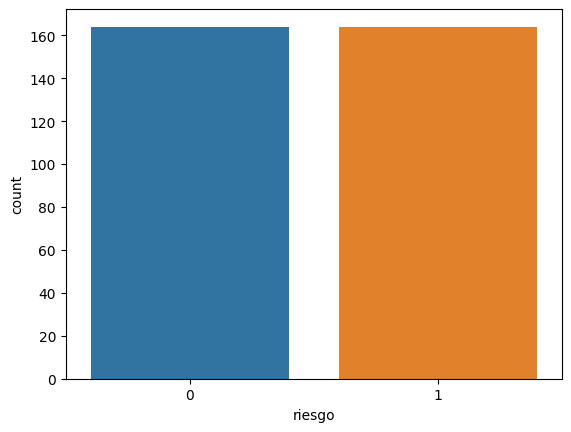

In [17]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, Y_over = oversample.fit_resample(X, Y)
sns.countplot(x=Y_over)
